continue form EDA notebook

     9 Data modelling

        Data modelling 1 :
            1 categorical features - one hot encoding 
            2 Real valued features - Normalization
            3 Include All Drugs 

        The EDA of drugs doesn't provide much information except for the insulin drug. Try a model only with insulin
        
         Data modelling 2 :
            1 categorical features - one hot encoding 
            2 Real valued features - Normalization
            3 Include only Insulin (Don't include all drugs)
        

     10 stacking the features

     11 Models

            SGD 
            Logistic Regression
            Decision Tree
            Random Forest
            Xgboost
            Custom model

     12 summary

     13 Training the best model


In [ ]:
y = df['readmitted'].values
X = df.drop(['readmitted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

In [ ]:
df.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,total_drugs_prescribed,total_procesure
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,8,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0,1,59
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,9,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,3,1,16
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,9,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0,1,45
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,8,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,0,2,51
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,0,1,37


In [11]:
d = {'[0-10)'  : 1 ,  '[10-20)' : 2, '[20-30)'  : 3, '[30-40)' : 4, '[40-50)' : 5,
     '[50-60)' : 6 ,  '[60-70)' : 7, '[70-80)'   : 8,  '[80-90)' : 9 , '[90-100)' : 10}

df['age']=df['age'].map(d)

In [12]:
y = df['readmitted'].values
X = df.drop(['readmitted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

In [13]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(46323, 43) (46323,)
(15441, 43) (15441,)
(20588, 43) (20588,)


In [14]:
X_train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,service_utilization,total_drugs_prescribed,total_procesure
19592,AfricanAmerican,Male,7,1,1,7,1,53,0,5,0,0,0,8,4,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,2,53
56380,Caucasian,Female,9,1,6,7,5,44,0,19,0,0,0,1,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,1,44
86462,Caucasian,Male,2,1,1,7,2,1,0,2,0,0,0,9,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1,1
37285,Caucasian,Male,5,1,2,7,1,54,3,11,0,0,0,1,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,1,57
37798,Caucasian,Male,9,3,3,1,3,30,1,14,2,0,0,6,8,None,None,Steady,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,2,2,31


1 Next step is to perform Data Modelling

2 Most of the features are categorical , which can be one hot encoded

4 The numerical features should be normalized 

5 Then all the features can be stacked together and different models can be tried to find the best model

# 12 Data Modelling -1

### making data ready

In [ ]:
X_train.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,service_utilization,total_drugs_prescribed,total_procesure
44442,AfricanAmerican,Female,8,2,1,7,8,1,0,22,0,0,2,2,9,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,2,2,1
54147,Caucasian,Male,6,1,1,1,2,21,0,10,0,0,0,9,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,21
19471,Caucasian,Female,7,1,3,7,5,16,2,7,0,0,0,1,4,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1,18
59147,AfricanAmerican,Female,7,3,1,4,1,34,6,22,0,2,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,2,1,40
86530,Caucasian,Female,9,3,1,1,6,43,4,20,0,0,0,7,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,47


In [15]:
#One hot encoding of race

race_vectorizer = CountVectorizer()
race_vectorizer.fit(X_train['race'].values) 

X_train_race = race_vectorizer.transform(X_train['race'].values)
X_cv_race = race_vectorizer.transform(X_cv['race'].values)
X_test_race = race_vectorizer.transform(X_test['race'].values)

print("After vectorizations")
print(X_train_race.shape, y_train.shape)
print(X_cv_race.shape, y_cv.shape)
print(X_test_race.shape, y_test.shape)
print(race_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 5) (46323,)
(15441, 5) (15441,)
(20588, 5) (20588,)
['africanamerican', 'asian', 'caucasian', 'hispanic', 'other']


In [14]:
import pickle

In [ ]:
pickle.dump(race_vectorizer,open('race_vec','ab'))

In [16]:
#One hot encoding of race

gender_vectorizer = CountVectorizer()
gender_vectorizer.fit(X_train['gender'].values) 

X_train_gender = gender_vectorizer.transform(X_train['gender'].values)
X_cv_gender = gender_vectorizer.transform(X_cv['gender'].values)
X_test_gender = gender_vectorizer.transform(X_test['gender'].values)

print("After vectorizations")
print(X_train_gender.shape, y_train.shape)
print(X_cv_gender.shape, y_cv.shape)
print(X_test_gender.shape, y_test.shape)
print(gender_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 2) (46323,)
(15441, 2) (15441,)
(20588, 2) (20588,)
['female', 'male']


In [ ]:
pickle.dump(gender_vectorizer,open('gender_vectorizer','ab'))

In [17]:
admission_type_id_enc = OneHotEncoder(handle_unknown='ignore')

X_train_admission_type = pd.DataFrame(admission_type_id_enc.fit_transform(X_train[['admission_type_id']]).toarray())
X_cv_admission_type = pd.DataFrame(admission_type_id_enc.transform(X_cv[['admission_type_id']]).toarray())
X_test_admission_type = pd.DataFrame(admission_type_id_enc.transform(X_test[['admission_type_id']]).toarray())


print(X_train_admission_type.shape, y_train.shape)
print(X_cv_admission_type.shape, y_cv.shape)
print(X_test_admission_type.shape, y_test.shape)

(46323, 5) (46323,)
(15441, 5) (15441,)
(20588, 5) (20588,)


In [ ]:
pickle.dump(admission_type_id_enc,open('admission_type_id_enc','ab'))

In [18]:
discharge_disposition_id_enc = OneHotEncoder(handle_unknown='ignore')

X_train_discharge_type = pd.DataFrame(discharge_disposition_id_enc.fit_transform(X_train[['discharge_disposition_id']]).toarray())
X_cv_discharge_type = pd.DataFrame(discharge_disposition_id_enc.transform(X_cv[['discharge_disposition_id']]).toarray())
X_test_discharge_type = pd.DataFrame(discharge_disposition_id_enc.transform(X_test[['discharge_disposition_id']]).toarray())


print(X_train_discharge_type.shape, y_train.shape)
print(X_cv_discharge_type.shape, y_cv.shape)
print(X_test_discharge_type.shape, y_test.shape)

(46323, 16) (46323,)
(15441, 16) (15441,)
(20588, 16) (20588,)


In [ ]:
pickle.dump(discharge_disposition_id_enc,open('discharge_disposition_id_enc','ab'))

In [19]:
admission_source_id_enc = OneHotEncoder(handle_unknown='ignore')

X_train_admission_source = pd.DataFrame(admission_source_id_enc.fit_transform(X_train[['admission_source_id']]).toarray())
X_cv_admission_source = pd.DataFrame(admission_source_id_enc.transform(X_cv[['admission_source_id']]).toarray())
X_test_admission_source = pd.DataFrame(admission_source_id_enc.transform(X_test[['admission_source_id']]).toarray())


print(X_train_admission_source.shape, y_train.shape)
print(X_cv_admission_source.shape, y_cv.shape)
print(X_test_admission_source.shape, y_test.shape)

(46323, 11) (46323,)
(15441, 11) (15441,)
(20588, 11) (20588,)


In [ ]:
pickle.dump(admission_source_id_enc,open('admission_source_id_enc','ab'))

In [20]:
#Normalizing the numerical feature num_lab_procedures
time_in_hospital_normalizer = Normalizer()
time_in_hospital_normalizer.fit(X_train['time_in_hospital'].values.reshape(1,-1))

X_train_time = time_in_hospital_normalizer.transform(X_train['time_in_hospital'].values.reshape(1,-1)).reshape(-1,1)
X_cv_time = time_in_hospital_normalizer.transform(X_cv['time_in_hospital'].values.reshape(1,-1)).reshape(-1,1)
X_test_time = time_in_hospital_normalizer.transform(X_test['time_in_hospital'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_time.shape, y_train.shape)
print(X_cv_time.shape, y_cv.shape)
print(X_test_time.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(time_in_hospital_normalizer,open('time_in_hospital_normalizer','ab'))

In [21]:
#Normalizing the numerical feature num_lab_procedures
num_lab_procedures_normalizer = Normalizer()
num_lab_procedures_normalizer.fit(X_train['num_lab_procedures'].values.reshape(1,-1))

X_train_num_lab_procedures = num_lab_procedures_normalizer.transform(X_train['num_lab_procedures'].values.reshape(1,-1)).reshape(-1,1)
X_cv_num_lab_procedures = num_lab_procedures_normalizer.transform(X_cv['num_lab_procedures'].values.reshape(1,-1)).reshape(-1,1)
X_test_num_lab_procedures = num_lab_procedures_normalizer.transform(X_test['num_lab_procedures'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_num_lab_procedures.shape, y_train.shape)
print(X_cv_num_lab_procedures.shape, y_cv.shape)
print(X_test_num_lab_procedures.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(num_lab_procedures_normalizer,open('num_lab_procedures_normalizer','ab'))

In [22]:
#Normalizing the numerical feature num_lab_procedures

num_procedures_normalizer = Normalizer()
num_procedures_normalizer.fit(X_train['num_procedures'].values.reshape(1,-1))

X_train_num_procedures = num_procedures_normalizer.transform(X_train['num_procedures'].values.reshape(1,-1)).reshape(-1,1)
X_cv_num_procedures = num_procedures_normalizer.transform(X_cv['num_procedures'].values.reshape(1,-1)).reshape(-1,1)
X_test_num_procedures = num_procedures_normalizer.transform(X_test['num_procedures'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_num_procedures.shape, y_train.shape)
print(X_cv_num_procedures.shape, y_cv.shape)
print(X_test_num_procedures.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(num_procedures_normalizer,open('num_procedures_normalizer','ab'))

In [23]:
#Normalizing the numerical feature num_medications

num_medications_normalizer = Normalizer()
num_medications_normalizer.fit(X_train['num_medications'].values.reshape(1,-1))

X_train_num_medications = num_medications_normalizer.transform(X_train['num_medications'].values.reshape(1,-1)).reshape(-1,1)
X_cv_num_medications = num_medications_normalizer.transform(X_cv['num_medications'].values.reshape(1,-1)).reshape(-1,1)
X_test_num_medications = num_medications_normalizer.transform(X_test['num_medications'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_num_medications.shape, y_train.shape)
print(X_cv_num_medications.shape, y_cv.shape)
print(X_test_num_medications.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(num_medications_normalizer,open('num_medications_normalizer','ab'))

In [24]:
#Normalizing the numerical feature num_medications

number_outpatient_normalizer = Normalizer()
number_outpatient_normalizer.fit(X_train['number_outpatient'].values.reshape(1,-1))

X_train_number_outpatient = number_outpatient_normalizer.transform(X_train['number_outpatient'].values.reshape(1,-1)).reshape(-1,1)
X_cv_number_outpatient = number_outpatient_normalizer.transform(X_cv['number_outpatient'].values.reshape(1,-1)).reshape(-1,1)
X_test_number_outpatient = number_outpatient_normalizer.transform(X_test['number_outpatient'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_number_outpatient.shape, y_train.shape)
print(X_cv_number_outpatient.shape, y_cv.shape)
print(X_test_number_outpatient.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(number_outpatient_normalizer,open('number_outpatient_normalizer','ab'))

In [25]:
#Normalizing the numerical feature num_medications

number_emergency_normalizer = Normalizer()
number_emergency_normalizer.fit(X_train['number_emergency'].values.reshape(1,-1))

X_train_emergency = number_emergency_normalizer.transform(X_train['number_emergency'].values.reshape(1,-1)).reshape(-1,1)
X_cv_emergency = number_emergency_normalizer.transform(X_cv['number_emergency'].values.reshape(1,-1)).reshape(-1,1)
X_test_emergency = number_emergency_normalizer.transform(X_test['number_emergency'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_emergency.shape, y_train.shape)
print(X_cv_emergency.shape, y_cv.shape)
print(X_test_emergency.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(number_emergency_normalizer,open('number_emergency_normalizer','ab'))

In [26]:
#Normalizing the numerical feature num_medications

number_inpatient_normalizer = Normalizer()
number_inpatient_normalizer.fit(X_train['number_inpatient'].values.reshape(1,-1))

X_train_number_inpatient = number_inpatient_normalizer.transform(X_train['number_inpatient'].values.reshape(1,-1)).reshape(-1,1)
X_cv_number_inpatient = number_inpatient_normalizer.transform(X_cv['number_inpatient'].values.reshape(1,-1)).reshape(-1,1)
X_test_number_inpatient = number_inpatient_normalizer.transform(X_test['number_inpatient'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_number_inpatient.shape, y_train.shape)
print(X_cv_number_inpatient.shape, y_cv.shape)
print(X_test_number_inpatient.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(number_inpatient_normalizer,open('number_inpatient_normalizer','ab'))

In [27]:
diag_1_enc = OneHotEncoder(handle_unknown='ignore')

X_train_diag_1 = pd.DataFrame(diag_1_enc.fit_transform(X_train[['diag_1']]).toarray())
X_cv_diag_1 = pd.DataFrame(diag_1_enc.transform(X_cv[['diag_1']]).toarray())
X_test_diag_1 = pd.DataFrame(diag_1_enc.transform(X_test[['diag_1']]).toarray())


print(X_train_diag_1.shape, y_train.shape)
print(X_cv_diag_1.shape, y_cv.shape)
print(X_test_diag_1.shape, y_test.shape)

(46323, 9) (46323,)
(15441, 9) (15441,)
(20588, 9) (20588,)


In [ ]:
pickle.dump(diag_1_enc,open('diag_1_enc','ab'))

In [28]:
#Normalizing the numerical feature num_medications

number_diagnoses_normalizer = Normalizer()
number_diagnoses_normalizer.fit(X_train['number_diagnoses'].values.reshape(1,-1))

X_train_num_diag = number_diagnoses_normalizer.transform(X_train['number_diagnoses'].values.reshape(1,-1)).reshape(-1,1)
X_cv_num_diag = number_diagnoses_normalizer.transform(X_cv['number_diagnoses'].values.reshape(1,-1)).reshape(-1,1)
X_test_num_diag = number_diagnoses_normalizer.transform(X_test['number_diagnoses'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_num_diag.shape, y_train.shape)
print(X_cv_num_diag.shape, y_cv.shape)
print(X_test_num_diag.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(number_diagnoses_normalizer,open('number_diagnoses_normalizer','ab'))

In [29]:
max_glu_serum_enc = OneHotEncoder(handle_unknown='ignore')

X_train_max_glu_serum = pd.DataFrame(max_glu_serum_enc.fit_transform(X_train[['max_glu_serum']]).toarray())
X_cv_max_glu_serum = pd.DataFrame(max_glu_serum_enc.transform(X_cv[['max_glu_serum']]).toarray())
X_test_max_glu_serum = pd.DataFrame(max_glu_serum_enc.transform(X_test[['max_glu_serum']]).toarray())

print(X_train_max_glu_serum.shape, y_train.shape)
print(X_cv_max_glu_serum.shape, y_cv.shape)
print(X_test_max_glu_serum.shape, y_test.shape)

(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)


In [ ]:
pickle.dump(max_glu_serum_enc,open('max_glu_serum_enc','ab'))

In [30]:
A1Cresult_enc = OneHotEncoder(handle_unknown='ignore')

X_train_a1c = pd.DataFrame(A1Cresult_enc.fit_transform(X_train[['A1Cresult']]).toarray())
X_cv_a1c = pd.DataFrame(A1Cresult_enc.transform(X_cv[['A1Cresult']]).toarray())
X_test_a1c = pd.DataFrame(A1Cresult_enc.transform(X_test[['A1Cresult']]).toarray())

print(X_train_a1c.shape, y_train.shape)
print(X_cv_a1c.shape, y_cv.shape)
print(X_test_a1c.shape, y_test.shape)

(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)


In [ ]:
pickle.dump(A1Cresult_enc,open('A1Cresult_enc','ab'))

In [31]:
#One hot encoding of metformin

metaformin_vectorizer = CountVectorizer()
metaformin_vectorizer.fit(X_train['metformin'].values) 

X_train_metformin = metaformin_vectorizer.transform(X_train['metformin'].values)
X_cv_metformin = metaformin_vectorizer.transform(X_cv['metformin'].values)
X_test_metformin = metaformin_vectorizer.transform(X_test['metformin'].values)

print("After vectorizations")
print(X_train_metformin.shape, y_train.shape)
print(X_cv_metformin.shape, y_cv.shape)
print(X_test_metformin.shape, y_test.shape)
print(metaformin_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [ ]:
pickle.dump(metaformin_vectorizer,open('metaformin_vectorizer','ab'))

In [32]:
#One hot encoding of repaglinide

repaglinide_vectorizer = CountVectorizer()
repaglinide_vectorizer.fit(X_train['repaglinide'].values) 

X_train_repaglinide = repaglinide_vectorizer.transform(X_train['repaglinide'].values)
X_cv_repaglinide = repaglinide_vectorizer.transform(X_cv['repaglinide'].values)
X_test_repaglinide = repaglinide_vectorizer.transform(X_test['repaglinide'].values)

print("After vectorizations")
print(X_train_repaglinide.shape, y_train.shape)
print(X_cv_repaglinide.shape, y_cv.shape)
print(X_test_repaglinide.shape, y_test.shape)
print(repaglinide_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [ ]:
pickle.dump(repaglinide_vectorizer,open('repaglinide_vectorizer','ab'))

In [33]:
#One hot encoding of nateglinide

nateglinide_vectorizer = CountVectorizer()
nateglinide_vectorizer.fit(X_train['nateglinide'].values) 

X_train_nateglinide = nateglinide_vectorizer.transform(X_train['nateglinide'].values)
X_cv_nateglinide = nateglinide_vectorizer.transform(X_cv['nateglinide'].values)
X_test_nateglinide = nateglinide_vectorizer.transform(X_test['nateglinide'].values)

print("After vectorizations")
print(X_train_nateglinide.shape, y_train.shape)
print(X_cv_nateglinide.shape, y_cv.shape)
print(X_test_nateglinide.shape, y_test.shape)
print(nateglinide_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [34]:
#One hot encoding of chlorpropamide

chlorpropamide_vectorizer = CountVectorizer()
chlorpropamide_vectorizer.fit(X_train['chlorpropamide'].values) 

X_train_chlorpropamide = chlorpropamide_vectorizer.transform(X_train['chlorpropamide'].values)
X_cv_chlorpropamide = chlorpropamide_vectorizer.transform(X_cv['chlorpropamide'].values)
X_test_chlorpropamide = chlorpropamide_vectorizer.transform(X_test['chlorpropamide'].values)

print("After vectorizations")
print(X_train_chlorpropamide.shape, y_train.shape)
print(X_cv_chlorpropamide.shape, y_cv.shape)
print(X_test_chlorpropamide.shape, y_test.shape)
print(chlorpropamide_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [35]:
#One hot encoding of glimepiride

glimipiride_vectorizer = CountVectorizer()
glimipiride_vectorizer.fit(X_train['glimepiride'].values) 

X_train_glimepiride = glimipiride_vectorizer.transform(X_train['glimepiride'].values)
X_cv_glimepiride = glimipiride_vectorizer.transform(X_cv['glimepiride'].values)
X_test_glimepiride = glimipiride_vectorizer.transform(X_test['glimepiride'].values)

print("After vectorizations")
print(X_train_glimepiride.shape, y_train.shape)
print(X_cv_glimepiride.shape, y_cv.shape)
print(X_test_glimepiride.shape, y_test.shape)
print(glimipiride_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [36]:
#One hot encoding of glipizide

glipizide_vectorizer = CountVectorizer()
glipizide_vectorizer.fit(X_train['glipizide'].values) 

X_train_glipizide = glipizide_vectorizer.transform(X_train['glipizide'].values)
X_cv_glipizide = glipizide_vectorizer.transform(X_cv['glipizide'].values)
X_test_glipizide = glipizide_vectorizer.transform(X_test['glipizide'].values)

print("After vectorizations")
print(X_train_glipizide.shape, y_train.shape)
print(X_cv_glipizide.shape, y_cv.shape)
print(X_test_glipizide.shape, y_test.shape)

print(glipizide_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [ ]:
#miss

In [37]:
#One hot encoding of glyburide

glyburide_vectorizer = CountVectorizer()
glyburide_vectorizer.fit(X_train['glyburide'].values) 

X_train_glyburide = glyburide_vectorizer.transform(X_train['glyburide'].values)
X_cv_glyburide = glyburide_vectorizer.transform(X_cv['glyburide'].values)
X_test_glyburide = glyburide_vectorizer.transform(X_test['glyburide'].values)

print("After vectorizations")
print(X_train_glyburide.shape, y_train.shape)
print(X_cv_glyburide.shape, y_cv.shape)
print(X_test_glyburide.shape, y_test.shape)
print(glyburide_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [38]:
#One hot encoding of tolbutamide

tolbutamide_vectorizer = CountVectorizer()
tolbutamide_vectorizer.fit(X_train['tolbutamide'].values) 

X_train_tolbutamide = tolbutamide_vectorizer.transform(X_train['tolbutamide'].values)
X_cv_tolbutamide = tolbutamide_vectorizer.transform(X_cv['tolbutamide'].values)
X_test_tolbutamide = tolbutamide_vectorizer.transform(X_test['tolbutamide'].values)

print("After vectorizations")
print(X_train_tolbutamide.shape, y_train.shape)
print(X_cv_tolbutamide.shape, y_cv.shape)
print(X_test_tolbutamide.shape, y_test.shape)
print(tolbutamide_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 2) (46323,)
(15441, 2) (15441,)
(20588, 2) (20588,)
['no', 'steady']


In [ ]:
pickle.dump(tolbutamide_vectorizer,open('tolbutamide_vectorizer','ab'))

In [39]:
#One hot encoding of pioglitazone

pioglitazone_vectorizer = CountVectorizer()
pioglitazone_vectorizer.fit(X_train['pioglitazone'].values) 

X_train_pioglitazone = pioglitazone_vectorizer.transform(X_train['pioglitazone'].values)
X_cv_pioglitazone = pioglitazone_vectorizer.transform(X_cv['pioglitazone'].values)
X_test_pioglitazone = pioglitazone_vectorizer.transform(X_test['pioglitazone'].values)

print("After vectorizations")
print(X_train_pioglitazone.shape, y_train.shape)
print(X_cv_pioglitazone.shape, y_cv.shape)
print(X_test_pioglitazone.shape, y_test.shape)
print(pioglitazone_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [40]:
#One hot encoding of rosiglitazone

rosiglitazone_vectorizer = CountVectorizer()
rosiglitazone_vectorizer.fit(X_train['rosiglitazone'].values) 

X_train_rosiglitazone = rosiglitazone_vectorizer.transform(X_train['rosiglitazone'].values)
X_cv_rosiglitazone = rosiglitazone_vectorizer.transform(X_cv['rosiglitazone'].values)
X_test_rosiglitazone = rosiglitazone_vectorizer.transform(X_test['rosiglitazone'].values)

print("After vectorizations")
print(X_train_rosiglitazone.shape, y_train.shape)
print(X_cv_rosiglitazone.shape, y_cv.shape)
print(X_test_rosiglitazone.shape, y_test.shape)
print(rosiglitazone_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [41]:
#One hot encoding of acarbose

acarbose_vectorizer = CountVectorizer()
acarbose_vectorizer.fit(X_train['acarbose'].values) 

X_train_acarbose = acarbose_vectorizer.transform(X_train['acarbose'].values)
X_cv_acarbose = acarbose_vectorizer.transform(X_cv['acarbose'].values)
X_test_acarbose = acarbose_vectorizer.transform(X_test['acarbose'].values)

print("After vectorizations")
print(X_train_acarbose.shape, y_train.shape)
print(X_cv_acarbose.shape, y_cv.shape)
print(X_test_acarbose.shape, y_test.shape)
print(acarbose_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [42]:
#One hot encoding of miglitol

miglitol_vectorizer = CountVectorizer()
miglitol_vectorizer.fit(X_train['miglitol'].values) 

X_train_miglitol = miglitol_vectorizer.transform(X_train['miglitol'].values)
X_cv_miglitol = miglitol_vectorizer.transform(X_cv['miglitol'].values)
X_test_miglitol = miglitol_vectorizer.transform(X_test['miglitol'].values)

print("After vectorizations")
print(X_train_miglitol.shape, y_train.shape)
print(X_cv_miglitol.shape, y_cv.shape)
print(X_test_miglitol.shape, y_test.shape)
print(miglitol_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [43]:
#One hot encoding of tolazamide

tolazamide_vectorizer = CountVectorizer()
tolazamide_vectorizer.fit(X_train['tolazamide'].values) 

X_train_tolazamide = tolazamide_vectorizer.transform(X_train['tolazamide'].values)
X_cv_tolazamide = tolazamide_vectorizer.transform(X_cv['tolazamide'].values)
X_test_tolazamide = tolazamide_vectorizer.transform(X_test['tolazamide'].values)

print("After vectorizations")
print(X_train_tolazamide.shape, y_train.shape)
print(X_cv_tolazamide.shape, y_cv.shape)
print(X_test_tolazamide.shape, y_test.shape)
print(tolazamide_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 2) (46323,)
(15441, 2) (15441,)
(20588, 2) (20588,)
['no', 'steady']


In [ ]:
pickle.dump(tolazamide_vectorizer,open('tolazamide_vectorizer','ab'))

In [44]:
#One hot encoding of insulin

insulin_vectorizer = CountVectorizer()
insulin_vectorizer.fit(X_train['insulin'].values) 

X_train_insulin = insulin_vectorizer.transform(X_train['insulin'].values)
X_cv_insulin = insulin_vectorizer.transform(X_cv['insulin'].values)
X_test_insulin = insulin_vectorizer.transform(X_test['insulin'].values)

print("After vectorizations")
print(X_train_insulin.shape, y_train.shape)
print(X_cv_insulin.shape, y_cv.shape)
print(X_test_insulin.shape, y_test.shape)
print(insulin_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [45]:
#One hot encoding of glyburide-metformin

glyburide_metformin_vectorizer = CountVectorizer()
glyburide_metformin_vectorizer.fit(X_train['glyburide-metformin'].values) 

X_train_glyburide_metformin = glyburide_metformin_vectorizer.transform(X_train['glyburide-metformin'].values)
X_cv_glyburide_metformin = glyburide_metformin_vectorizer.transform(X_cv['glyburide-metformin'].values)
X_test_glyburide_metformin = glyburide_metformin_vectorizer.transform(X_test['glyburide-metformin'].values)

print("After vectorizations")
print(X_train_insulin.shape, y_train.shape)
print(X_cv_insulin.shape, y_cv.shape)
print(X_test_insulin.shape, y_test.shape)
print(glyburide_metformin_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 4) (46323,)
(15441, 4) (15441,)
(20588, 4) (20588,)
['down', 'no', 'steady', 'up']


In [46]:
#One hot encoding of glipizide-metformin

glipizide_metformin_vectorizer = CountVectorizer()
glipizide_metformin_vectorizer.fit(X_train['glipizide-metformin'].values) 

X_train_glipizide_metformin = glipizide_metformin_vectorizer.transform(X_train['glipizide-metformin'].values)
X_cv_glipizide_metformin = glipizide_metformin_vectorizer.transform(X_cv['glipizide-metformin'].values)
X_test_glipizide_metformin = glipizide_metformin_vectorizer.transform(X_test['glipizide-metformin'].values)

print("After vectorizations")
print(X_train_glipizide_metformin.shape, y_train.shape)
print(X_cv_glipizide_metformin.shape, y_cv.shape)
print(X_test_glipizide_metformin.shape, y_test.shape)
print(glipizide_metformin_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 2) (46323,)
(15441, 2) (15441,)
(20588, 2) (20588,)
['no', 'steady']


In [47]:
#One hot encoding of change

change_vectorizer = CountVectorizer()
change_vectorizer.fit(X_train['change'].values) 

X_train_change = change_vectorizer.transform(X_train['change'].values)
X_cv_change = change_vectorizer.transform(X_cv['change'].values)
X_test_change = change_vectorizer.transform(X_test['change'].values)

print("After vectorizations")
print(X_train_change.shape, y_train.shape)
print(X_cv_change.shape, y_cv.shape)
print(X_test_change.shape, y_test.shape)
print(change_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(46323, 2) (46323,)
(15441, 2) (15441,)
(20588, 2) (20588,)
['ch', 'no']


In [ ]:
pickle.dump(change_vectorizer,open('change_vectorizer','ab'))

In [48]:
#One hot encoding of change

diabetesMed_enc = CountVectorizer()
diabetesMed_enc.fit(X_train['diabetesMed'].values) 

X_train_diabetesMed = diabetesMed_enc.transform(X_train['diabetesMed'].values)
X_cv_diabetesMed = diabetesMed_enc.transform(X_cv['diabetesMed'].values)
X_test_diabetesMed = diabetesMed_enc.transform(X_test['diabetesMed'].values)

print("After vectorizations")
print(change_vectorizer.get_feature_names())
print("="*100)


print(X_train_diabetesMed.shape, y_train.shape)
print(X_cv_diabetesMed.shape, y_cv.shape)
print(X_test_diabetesMed.shape, y_test.shape)

After vectorizations
['ch', 'no']
(46323, 2) (46323,)
(15441, 2) (15441,)
(20588, 2) (20588,)


In [ ]:
pickle.dump(diabetesMed_enc,open('diabetesMed_enc','ab'))

In [49]:
X_train_age = (X_train['age'].values.reshape(-1,1))
X_cv_age = (X_cv['age'].values.reshape(-1,1))
X_test_age = (X_test['age'].values.reshape(-1,1))

In [50]:
#Normalizing the numerical feature num_lab_procedures
service_utilization_normalizer = Normalizer()
service_utilization_normalizer.fit(X_train['service_utilization'].values.reshape(1,-1))

X_train_service = service_utilization_normalizer.transform(X_train['service_utilization'].values.reshape(1,-1)).reshape(-1,1)
X_cv_service= service_utilization_normalizer.transform(X_cv['service_utilization'].values.reshape(1,-1)).reshape(-1,1)
X_test_service= service_utilization_normalizer.transform(X_test['service_utilization'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_service.shape, y_train.shape)
print(X_cv_service.shape, y_cv.shape)
print(X_test_service.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(service_utilization_normalizer,open('service_utilization_normalizer','ab'))

In [51]:
total_procesure_normalizer = Normalizer()
total_procesure_normalizer.fit(X_train['total_procesure'].values.reshape(1,-1))

X_train_procedure = total_procesure_normalizer.transform(X_train['total_procesure'].values.reshape(1,-1)).reshape(-1,1)
X_cv_procedure= total_procesure_normalizer.transform(X_cv['total_procesure'].values.reshape(1,-1)).reshape(-1,1)
X_test_procedure= total_procesure_normalizer.transform(X_test['total_procesure'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_procedure.shape, y_train.shape)
print(X_cv_procedure.shape, y_cv.shape)
print(X_test_procedure.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(total_procesure_normalizer,open('total_procesure_normalizer','ab'))

In [52]:
total_drugs_prescribed_normalizer = Normalizer()
total_drugs_prescribed_normalizer.fit(X_train['total_drugs_prescribed'].values.reshape(1,-1))

X_train_drugs_prescribed = total_drugs_prescribed_normalizer.transform(X_train['total_drugs_prescribed'].values.reshape(1,-1)).reshape(-1,1)
X_cv_drugs_prescribed= total_drugs_prescribed_normalizer.transform(X_cv['total_drugs_prescribed'].values.reshape(1,-1)).reshape(-1,1)
X_test_drugs_prescribed= total_drugs_prescribed_normalizer.transform(X_test['total_drugs_prescribed'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(X_train_drugs_prescribed.shape, y_train.shape)
print(X_cv_drugs_prescribed.shape, y_cv.shape)
print(X_test_drugs_prescribed.shape, y_test.shape)

After vectorizations
(46323, 1) (46323,)
(15441, 1) (15441,)
(20588, 1) (20588,)


In [ ]:
pickle.dump(total_drugs_prescribed_normalizer,open('total_drugs_prescribed_normalizer','ab'))

###  Stacking the features

In [252]:
X_tr = hstack((X_train_race ,X_train_gender ,X_train_age,           
               X_train_admission_type,X_train_discharge_type,X_train_admission_source,
                X_train_time,X_train_num_lab_procedures,X_train_num_procedures,X_train_num_medications,
               X_train_number_outpatient,X_train_emergency,X_train_number_inpatient,X_train_diag_1,X_train_num_diag,
               X_train_max_glu_serum,X_train_a1c,X_train_metformin,
               X_train_repaglinide , X_train_nateglinide , X_train_chlorpropamide , X_train_glimepiride , 
               X_train_glipizide , X_train_glyburide , X_train_tolbutamide, X_train_pioglitazone , X_train_rosiglitazone ,
               X_train_acarbose , X_train_miglitol,  X_train_tolazamide , 
               X_train_insulin ,  X_train_glyburide_metformin, X_train_glipizide_metformin , 
               X_train_change,X_train_diabetesMed,
               X_train_service,X_train_procedure,X_train_drugs_prescribed)).tocsr()

In [253]:
X_cr = hstack((X_cv_race ,X_cv_gender ,X_cv_age,        
               X_cv_admission_type,X_cv_discharge_type,X_cv_admission_source,
                X_cv_time,X_cv_num_lab_procedures,X_cv_num_procedures,X_cv_num_medications,
               X_cv_number_outpatient,X_cv_emergency,X_cv_number_inpatient,X_cv_diag_1,X_cv_num_diag,
               X_cv_max_glu_serum,X_cv_a1c,X_cv_metformin,X_cv_repaglinide , 
               X_cv_nateglinide , X_cv_chlorpropamide , X_cv_glimepiride , 
               X_cv_glipizide , X_cv_glyburide , X_cv_tolbutamide,
               X_cv_pioglitazone , X_cv_rosiglitazone ,X_cv_acarbose , X_cv_miglitol,
               X_cv_tolazamide , X_cv_insulin , X_cv_glyburide_metformin,
               X_cv_glipizide_metformin , X_cv_change,X_cv_diabetesMed,
               X_cv_service,X_cv_procedure,X_cv_drugs_prescribed)).tocsr()

In [254]:
X_te = hstack((X_test_race ,X_test_gender ,X_test_age,
               X_test_admission_type,X_test_discharge_type,X_test_admission_source,
                X_test_time,X_test_num_lab_procedures,X_test_num_procedures,X_test_num_medications,
               X_test_number_outpatient,X_test_emergency,X_test_number_inpatient,X_test_diag_1,X_test_num_diag,
               X_test_max_glu_serum,X_test_a1c,X_test_metformin,X_test_repaglinide , 
               X_test_nateglinide , X_test_chlorpropamide , X_test_glimepiride , 
               X_test_glipizide , X_test_glyburide , X_test_tolbutamide,
               X_test_pioglitazone , X_test_rosiglitazone ,
               X_test_acarbose , X_test_miglitol,X_test_tolazamide , 
               X_test_insulin , X_test_glyburide_metformin,
               X_test_glipizide_metformin ,  X_test_change,X_test_diabetesMed,
               X_test_service,X_test_procedure,X_test_drugs_prescribed)).tocsr()

### Models

In [58]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [59]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [60]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import math
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [61]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

In [ ]:
def best_model(model) :

  model.fit(X_tr, y_train)

  y_train_pred = batch_predict(model, X_tr)    
  y_test_pred = batch_predict(model, X_te)

  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

  plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
  plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
  plt.legend()
  plt.xlabel("hyperparameter")
  plt.ylabel("AUC")
  plt.title("ERROR PLOTS")
  plt.grid()
  plt.show()


  print("="*100)
  best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

  print('Best threshold ',best_t)
  print("Train confusion matrix")
  print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
  print("Test confusion matrix")
  print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

  tn ,fp,fn,tp = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)).ravel()

  recall = tp / (tp+fn)
  precision = tp/(tp+fp)

  print('\nRecall ',recall)
  print('\nPrecision',precision)
  print('\nF1 Score',f1_score(y_test, predict_with_best_t(y_test_pred, best_t),average='macro'))

### SGD

In [211]:
def SGD(X_tr,y_train) :
  alpha = [.00001,.0001,.001,.1,1,10]

  print('alpha   Train AUC \t    Val AUC')

  for i in alpha :         
    model = SGDClassifier(alpha=i,penalty='l1',class_weight="balanced")
    model.fit(X_tr,y_train)

    calibrator = CalibratedClassifierCV(model, cv='prefit')
    new_model=calibrator.fit(X_tr,y_train)

    y_train_pred = batch_predict(new_model, X_tr)    
    y_cv_pred = batch_predict(new_model, X_cr)

    print(i,'\t',roc_auc_score(y_train,y_train_pred),roc_auc_score(y_cv, y_cv_pred))

In [212]:
def sgd_best_model(alpha,X_tr,y_train) :

  model = SGDClassifier(alpha=alpha,penalty='l1',class_weight="balanced")
  model.fit(X_tr,y_train)
  calibrator = CalibratedClassifierCV(model, cv='prefit')
  model=calibrator.fit(X_tr,y_train)


  y_train_pred = batch_predict(model, X_tr)    
  y_test_pred = batch_predict(model, X_te)

  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

  plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
  plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
  plt.legend()
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("AUC PLOT")
  plt.grid()
  plt.show()


  print("="*100)
  best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

  print('METRICS \n ')

  print("Train confusion matrix")
  print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
  print("Test confusion matrix")
  print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

  tn ,fp,fn,tp = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)).ravel()
  recall = tp / (tp+fn)
  precision = tp/(tp+fp)

  print('\nRecall ',recall)
  print('\nPrecision',precision)
  print('\nF1 Score',f1_score(y_test, predict_with_best_t(y_test_pred, best_t),average='macro'))


In [115]:
SGD(X_tr,y_train)

alpha   Train AUC 	    Val AUC
1e-05 	 0.634306060743085 0.642010385167406
0.0001 	 0.619205214442357 0.646565084329323
0.001 	 0.5966494884271023 0.6109024440632583
0.1 	 0.5 0.5
1 	 0.5 0.5
10 	 0.5 0.5


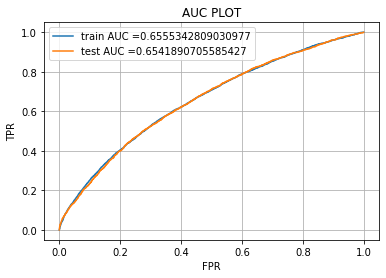

the maximum value of tpr*(1-fpr) 0.3769852956353257 for threshold 0.109
METRICS 
 
Train confusion matrix
[[25577 15432]
 [ 2102  3212]]
Test confusion matrix
[[9821 8405]
 [ 760 1602]]

Recall  0.6782387806943269

Precision 0.16008793844308983

F1 Score 0.47044142269399664


In [214]:
alpha=.00001
sgd_best_model(alpha,X_tr,y_train)

###Logistic Regresssion

In [145]:
def Logistic_regression(X_tr,y_train) :

  print('C.      Train AUC \t    Val AUC')

  C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

  for i in C :

    model = LogisticRegression(C=i,penalty='l1', solver='liblinear')
    model.fit(X_tr,y_train)
    y_train_pred = batch_predict(model, X_tr)    
    y_cv_pred = batch_predict(model, X_cr)
    print(i,'\t',roc_auc_score(y_train,y_train_pred),roc_auc_score(y_cv, y_cv_pred))

In [120]:
Logistic_regression(X_tr,y_train)

C.      Train AUC 	    Val AUC
0.001 	 0.6049651676468606 0.6135169429037084
0.01 	 0.6128611596710831 0.6153832211986491
0.1 	 0.6201252278420244 0.624100818331903
1 	 0.6445612473896946 0.6545526472631634
10 	 0.6650745391606621 0.6689112319699203
100 	 0.6687133119011218 0.6688536384334756
1000 	 0.6689039674254565 0.6684511855350799


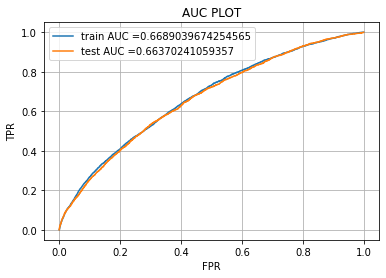

the maximum value of tpr*(1-fpr) 0.38337246219660437 for threshold 0.459
Best threshold  0.45933412149342223
Train confusion matrix
[[24153 16856]
 [ 1855  3459]]
Test confusion matrix
[[ 7252 10974]
 [  478  1884]]

Recall  0.7976291278577476

Precision 0.14652356509566028

F1 Score 0.40318039484185203


In [218]:
c = 1000
model = LogisticRegression(C=c,penalty='l2', solver='liblinear',class_weight="balanced")
best_model(model)

### Decision Tree

In [162]:
def decision_tree(X_tr,y_train) :

  depths = [1,5,10,50]
  min_samples=[5,10,100,500]

  print('DEPTH. ','Min Samples ','Train auc ','Test auc')

  for depth  in (depths):
    
      for sample in min_samples :
        
          model=DecisionTreeClassifier(criterion='gini',max_depth=depth,min_samples_split=sample)
          model.fit(X_tr, y_train)

          y_train_pred = batch_predict(model, X_tr)    
          y_cv_pred = batch_predict(model, X_cr)
   
          print(depth,'\t',sample,'\t',roc_auc_score(y_train,y_train_pred),'\t',roc_auc_score(y_cv, y_cv_pred))

In [ ]:
decision_tree(X_tr,y_train)

DEPTH.  Min Samples  Train auc  Test auc
1 	 5 	 0.5771801008128483 	 0.5918735396219585
1 	 10 	 0.5771801008128483 	 0.5918735396219585
1 	 100 	 0.5771801008128483 	 0.5918735396219585
1 	 500 	 0.5771801008128483 	 0.5918735396219585
5 	 5 	 0.6621203100601772 	 0.6398512468360711
5 	 10 	 0.6620959641738684 	 0.6398518661214092
5 	 100 	 0.6620269141834375 	 0.6412783279692214
5 	 500 	 0.662007476020323 	 0.6412338013534109
10 	 5 	 0.7075296854386673 	 0.5569007006511744
10 	 10 	 0.7047874383174451 	 0.5693800020708902
10 	 100 	 0.6947844453175607 	 0.5803291113486598
10 	 500 	 0.6881224898510165 	 0.5833988055554683
50 	 5 	 0.9946820287748506 	 0.5297807094103462
50 	 10 	 0.9760438153634047 	 0.5342411946294915
50 	 100 	 0.8404869597595974 	 0.5367329924016166
50 	 500 	 0.7344631257816279 	 0.5606254336029509


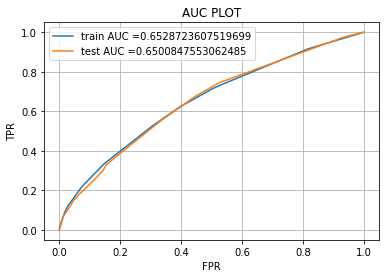

the maximum value of tpr*(1-fpr) 0.37589235325148207 for threshold 0.122
Best threshold  0.12170291531698288
Train confusion matrix
[[24703 16306]
 [ 1998  3316]]
Test confusion matrix
[[10086  8140]
 [  766  1596]]

Recall  0.6756985605419137

Precision 0.1639276910435497

F1 Score 0.4787828010400561


In [219]:
depth=5
samples=500
model=DecisionTreeClassifier(criterion='gini',max_depth=depth,min_samples_split=samples)
best_model(model)

### Random Forest

1 Random forest has many hyperparameters such as not of Estimators , depth , maximum features , min sample split , min samples leaf .

2 To hypertune Random forest ..  Use defualt values for all hyperparameters except for 'n_estimators' and find the best best value of 'n_estimators'

2 Fix 'n_estimators' and now hypertune 'depth'

3 find estimators and depth and for other hyperparameters randomsearchCV can be done

In [72]:
def random_forest_estimator(X_tr,y_train) :

  estimators = [10,50,100,250,450]
  print('Estimators ','Train auc ','  Test auc')

  for i in estimators:
      model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=5, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
  
      model.fit(X_tr,y_train)
      y_train_pred = batch_predict(model, X_tr)    
      y_cv_pred = batch_predict(model, X_cr)
    
      print(i,'\t',roc_auc_score(y_train,y_train_pred),roc_auc_score(y_cv, y_cv_pred))

In [73]:
def random_forest_depth(estimator,X_tr,y_train) :
  depths = [3,5,9,11,15,20]

  print('Depth ','   Train auc ','     Test auc')

  for i in depths:
      model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=i, max_features='auto', max_leaf_nodes=None,
              min_weight_fraction_leaf=0.0, n_estimators=estimator, 
              n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    
      model.fit(X_tr,y_train)
      y_train_pred = batch_predict(model, X_tr)    
      y_cv_pred = batch_predict(model, X_cr)

      print(i,'\t',roc_auc_score(y_train,y_train_pred),roc_auc_score(y_cv, y_cv_pred))

In [74]:
def random_forest_other_hyperparameters(estimator,depth,X_tr,y_train) :

  max_features = ['auto', 'sqrt']
  min_samples_split = [2, 5, 10]
  min_samples_leaf = [1, 2, 4]

  random_grid = {
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

  clf = RandomForestClassifier(n_estimators=estimator,max_depth=depth,
                               bootstrap=True, class_weight=None, criterion='gini',
                              max_features='auto', max_leaf_nodes=None,min_weight_fraction_leaf=0.0,
                              n_jobs=-1,random_state=25,verbose=0,warm_start=False)

  rf_random = RandomizedSearchCV(clf, param_distributions=random_grid,cv=3,scoring='roc_auc',random_state=25)

  rf_random.fit(X_tr,y_train)

  print(rf_random.best_estimator_)

In [ ]:
random_forest_estimator(X_tr,y_train)

Estimators  Train auc    Test auc
10 	 0.6721356928240864 0.6421906178436418
50 	 0.6810726039896526 0.6506768912602654
100 	 0.68134699825799 0.6531108271389661
250 	 0.6816648370044402 0.6540008846697484
450 	 0.6823094557770454 0.6535096056110224


In [ ]:
estimator=50
random_forest_depth(estimator,X_tr,y_train)

Depth     Train auc       Test auc
3 	 0.6662392481054192 0.6504968650124757
5 	 0.6810725535128364 0.6506769325459548
9 	 0.7367306958046506 0.6417137887761386
11 	 0.7839011614192329 0.63939411104232
15 	 0.9180279353936766 0.6245741587586682
20 	 0.993401480125263 0.6276590460991051


In [ ]:
estimator=50
depth=3
random_forest_other_hyperparameters(estimator,depth,X_tr,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


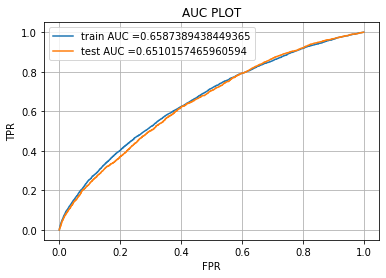

the maximum value of tpr*(1-fpr) 0.37686265991548734 for threshold 0.113
Best threshold  0.11333893298358927
Train confusion matrix
[[26501 14508]
 [ 2215  3099]]
Test confusion matrix
[[8655 9571]
 [ 650 1712]]

Recall  0.724809483488569

Precision 0.15173269520517593

F1 Score 0.43984009284766556


In [220]:
estimator=50
depth=3
max_featues='auto'
min_samples_split=2
min_samples_leaf=2

model = RandomForestClassifier(n_estimators=estimator,max_depth=depth,max_features=max_featues, min_samples_leaf=min_samples_leaf,
                               bootstrap=True, class_weight=None, criterion='gini',
                              max_leaf_nodes=None,min_weight_fraction_leaf=0.0,
                              n_jobs=-1,random_state=25,verbose=0,warm_start=False)



model  = best_model(model)

### XGBoost

1 Find the best learning rate 

2 Fix learning rate and then find the best n_estimators

3 Fix learning rate , n_estimators and find the best depth

In [167]:
from xgboost.sklearn import XGBClassifier

In [174]:
def XGBoost_learning_rate(X_tr,y_train) :

  print('LearningRate , Train ACU ','CV auc')

  learning_rate  = [0.0001, .001,.01,0.1, 0.15, 0.20, 0.25, 0.30 ]

  for i in learning_rate :
    model = XGBClassifier(learning_rate=i)
    model.fit(X_tr,y_train)
    y_train_pred = batch_predict(model, X_tr)    
    y_cv_pred = batch_predict(model, X_cr)

    print(i,'\t',roc_auc_score(y_train,y_train_pred),roc_auc_score(y_cv, y_cv_pred))


In [177]:
def XGBoost_estimators(learning_rate,X_tr,y_train) :

  print('Estimators , Train ACU ','CV auc')

  estimators = [2,5,10,50,100,250,450]

  for i in estimators :
    model = XGBClassifier(learning_rate=learning_rate,n_estimators=i)
    model.fit(X_tr,y_train)
    y_train_pred = batch_predict(model, X_tr)    
    y_cv_pred = batch_predict(model, X_cr)

    print(i,'\t',roc_auc_score(y_train,y_train_pred),roc_auc_score(y_cv, y_cv_pred))

In [170]:
def XGBoost_depth(learning_rate,estimator,X_tr,y_train) :

  print('Depth  Train ACU ','CV auc')

  depths = [1,2,3,4,5,6,7]

  for i in depths :

    model = XGBClassifier(learning_rate=.05,n_estimators=estimator,max_depth=i)
    model.fit(X_tr,y_train)
    y_train_pred = batch_predict(model, X_tr)    
    y_cv_pred = batch_predict(model, X_cr)

    print(i,'\t',roc_auc_score(y_train,y_train_pred),roc_auc_score(y_cv, y_cv_pred))

In [ ]:
XGBoost_learning_rate(X_tr,y_train)

LearningRate , Train ACU  CV auc
0.05 	 0.6805821689471343 0.6585508979059402
0.1 	 0.6902501404333865 0.6591041467841668
0.15 	 0.6992798371650942 0.6583330333239918
0.2 	 0.7075256564709584 0.6520887586169426
0.25 	 0.7124193677598865 0.6458488808357941
0.3 	 0.7183439510092945 0.6413545826371878


In [ ]:
learning_rate=.05
XGBoost_estimators(learning_rate,X_tr,y_train)

Estimators , Train ACU  CV auc
10 	 0.652043086312979 0.6435895421367523
50 	 0.6695037742571045 0.653928944356304
100 	 0.6805821689471343 0.6585508979059402
250 	 0.6943256477669199 0.6600872003298892
450 	 0.7075768147243773 0.6510176426961405


In [ ]:
learning_rate=.05
estimator=10
XGBoost_depth(learning_rate,estimator,X_tr,y_train)

Depth  Train ACU  CV auc
1 	 0.6097367250401068 0.6031095225111872
2 	 0.6511111603846418 0.6368684590050446
3 	 0.652043086312979 0.6435895421367523
4 	 0.6697865797985743 0.6507989730432524
5 	 0.6765713751866231 0.6548873916312589
6 	 0.6839482108597971 0.6474172003117233
7 	 0.6923802758517635 0.6225936842473793


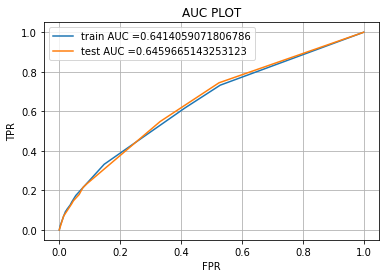

the maximum value of tpr*(1-fpr) 0.3623135848724028 for threshold 0.349
Best threshold  0.34898865
Train confusion matrix
[[24094 16915]
 [ 2037  3277]]
Test confusion matrix
[[8662 9564]
 [ 604 1758]]

Recall  0.7442845046570703

Precision 0.15527291997880233

F1 Score 0.44354468316961004


In [221]:
depth=3
learning_rate=.05
estimator=10
model = XGBClassifier(learning_rate=learning_rate,n_estimators=estimator,max_depth=depth)
best_model(model)

### Custom Model

In [255]:
# Split the train data into D1 and D2
D1_x, D2_x, D1_y, D2_y = train_test_split(X_tr, y_train, test_size=0.50, stratify=y_train)

In [256]:
# Split the train data into D1 and D2
D1_x, D2_x, D1_y, D2_y = train_test_split(X_tr, y_train, test_size=0.50, stratify=y_train)

In [257]:
#D1 dataset
D1_x.shape, D1_y.shape

((23161, 130), (23161,))

In [258]:
#D2 dataset
D2_x.shape, D2_y.shape

((23162, 130), (23162,))

In [261]:
from sklearn.utils import resample

In [266]:
from sklearn.model_selection import GridSearchCV

In [265]:
def train_models(i,X,Y,samples) :

    model_list  = []

    tree_para = {'criterion':['gini','entropy'],
                 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
                 'min_samples_split':[5,10,100,500]}
    for j in range(0,i) :
      
      # sample 70% of D1 data to create a new model

      new_X , new_Y = resample(X,Y,replace=True,n_samples=samples,stratify=Y)
      dt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=2)
      dt.fit(new_X,new_Y)
      model_list.append(dt)

    return model_list

In [267]:
def predict_using_new_models(model_list,X) :
   
  predicted_data = []

  for models in model_list :
    pred = batch_predict(models,X)
    predicted_data.append(pred)

  new_X = np.array(predicted_data)
  new_X = new_X.T

  return new_X

In [268]:
def best_Custom_model(X_tr,y_train,best_val,C) :

  new_X_tr = predict_using_new_models(all_models[best_val],X_tr)     # Predict using D2
  new_X_te = predict_using_new_models(all_models[best_val],X_te)     # Predict using D2

  model = LogisticRegression(C=C,penalty='l1', solver='liblinear')
  model.fit(new_X_tr, y_train)

  y_train_pred = batch_predict(model, new_X_tr)    
  y_test_pred = batch_predict(model, new_X_te)

  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

  plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
  plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
  plt.legend()
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("AUC PLOT")
  plt.grid()
  plt.show()


  print("="*100)
  best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
  print("Train confusion matrix")
  print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
  print("Test confusion matrix")
  print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

  tn ,fp,fn,tp = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)).ravel()

  recall = tp / (tp+fn)
  precision = tp/(tp+fp)

  print('\nRecall ',recall)
  print('\nPrecision',precision)
  print('\nF1 Score',f1_score(y_test, predict_with_best_t(y_test_pred, best_t),average='macro'))

In [269]:
def custom_model():

  all_models = {}

  samples  = 16213

  for i in  [3,4,5,6,7,9,11,13] :

    print('Decision Trees',i)

    model_list = train_models(i,D1_x,D1_y,samples)                 # Fit 'i' models using D1
    new_X = predict_using_new_models(model_list,D2_x)              # Predict using D2


    C = [0.01, 0.1, 1, 10]           
    all_models[i]=model_list                                       #save the models to predict test data

    print('C   Train AUC \t    Val AUC')

    for c in C :                                                   #Hypertune the meta classifier (Logistic regression)

      model = LogisticRegression(C=c,penalty='l1', solver='liblinear')

      model.fit(new_X,D2_y)
      y_train_pred = batch_predict(model,new_X)    

      new_X_cv =  predict_using_new_models(model_list,X_cr)

      y_cv_pred = batch_predict(model,new_X_cv)

      print(c,'\t',roc_auc_score(D2_y,y_train_pred),roc_auc_score(y_cv,y_cv_pred))

  return all_models

In [270]:
all_models = custom_model()

Decision Trees 3
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.649677126033958 0.6519523919854899
1 	 0.6496794937977894 0.6520736274118482
10 	 0.6496836144410466 0.6520736274118482
Decision Trees 4
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6556711752377424 0.6556361282478831
1 	 0.6554008280015055 0.655704972134637
10 	 0.6554363077494616 0.6556891390728258
Decision Trees 5
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6551928318794987 0.6531101872107834
1 	 0.6551518457040275 0.6531375183370389
10 	 0.655147422207257 0.6530956546481824
Decision Trees 6
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6557922524014218 0.648552370979331
1 	 0.6553273080167985 0.6489884717144311
10 	 0.6553263352146043 0.6489838477172399
Decision Trees 7
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6560713273252703 0.656248498233055
1 	 0.6564557493848632 0.6567854599068893
10 	 0.6564942393131944 0.6568012723258557
Decision Trees 9
C   Train AUC 	    Val AUC
0.01 	 0.609480223527

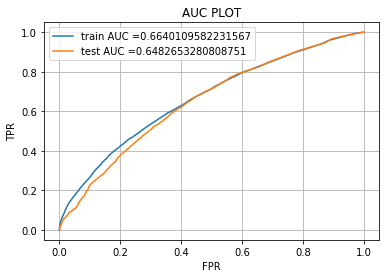

the maximum value of tpr*(1-fpr) 0.38129209691919524 for threshold 0.106
Train confusion matrix
[[26370 14639]
 [ 2163  3151]]
Test confusion matrix
[[10386  7840]
 [  817  1545]]

Recall  0.6541066892464014

Precision 0.16462440063931805

F1 Score 0.48444013255410334


In [274]:
best_val = 6
c =.1
best_Custom_model(X_tr,y_train,best_val,c)

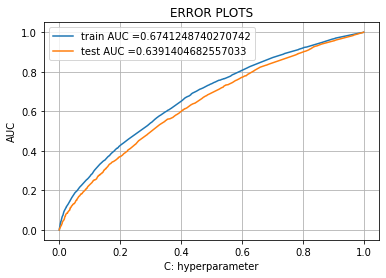

the maximum value of tpr*(1-fpr) 0.3920738072376468 for threshold 0.102
Train confusion matrix
[[24136 16873]
 [ 1774  3540]]
Test confusion matrix
[[10258  7968]
 [  858  1504]]

Recall  0.6367485182049111

Precision 0.15878378378378377

F1 Score 0.47669268564355255


In [ ]:
best_val = 7
c =.1
best_Custom_model(X_tr,y_train,best_val,c)

# Data Modelling - 2

### stacking features

In [ ]:
X_tr = hstack((X_train_race ,X_train_gender ,X_train_age,           
               X_train_admission_type,X_train_discharge_type,X_train_admission_source,
                X_train_time,X_train_num_lab_procedures,X_train_num_procedures,X_train_num_medications,
               X_train_number_outpatient,X_train_emergency,X_train_number_inpatient,X_train_diag_1,X_train_num_diag,
               X_train_max_glu_serum,X_train_a1c,
               X_train_insulin ,X_train_change,X_train_diabetesMed,
               X_train_service,X_train_procedure,X_train_drugs_prescribed)).tocsr()

In [ ]:
X_cr = hstack((X_cv_race ,X_cv_gender ,X_cv_age,        
               X_cv_admission_type,X_cv_discharge_type,X_cv_admission_source,
                X_cv_time,X_cv_num_lab_procedures,X_cv_num_procedures,X_cv_num_medications,
               X_cv_number_outpatient,X_cv_emergency,X_cv_number_inpatient,X_cv_diag_1,X_cv_num_diag,
               X_cv_max_glu_serum,X_cv_a1c,
               X_cv_insulin , X_cv_change,X_cv_diabetesMed,
               X_cv_service,X_cv_procedure,X_cv_drugs_prescribed)).tocsr()

In [ ]:
X_te = hstack((X_test_race ,X_test_gender ,X_test_age,
               X_test_admission_type,X_test_discharge_type,X_test_admission_source,
                X_test_time,X_test_num_lab_procedures,X_test_num_procedures,X_test_num_medications,
               X_test_number_outpatient,X_test_emergency,X_test_number_inpatient,X_test_diag_1,X_test_num_diag,
               X_test_max_glu_serum,X_test_a1c, 
               X_test_insulin , X_test_change,X_test_diabetesMed,
               X_test_service,X_test_procedure,X_test_drugs_prescribed)).tocsr()

### CUSTOM model

In [ ]:
D1_x, D2_x, D1_y, D2_y = train_test_split(X_tr, y_train, test_size=0.50, stratify=y_train)

In [249]:
all_models = custom_model()

Decision Trees 3
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6373550352654562 0.6504984132258209
1 	 0.6373419850322453 0.6504972985122124
10 	 0.6373419666774869 0.6504972572265231
Decision Trees 4
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6420751908183625 0.6467095016701713
1 	 0.6420628931302451 0.6465414276294071
10 	 0.6420918385842167 0.6465470837688285
Decision Trees 5
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6405505069263057 0.6184038473638345
1 	 0.640640683854246 0.6162874190779849
10 	 0.6406318552154633 0.6162829189378612
Decision Trees 6
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6430055751660854 0.6390181222707063
1 	 0.6428876366660894 0.640194723127434
10 	 0.6428702088230038 0.6402479403808224
Decision Trees 7
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 	 0.6411572693515825 0.6335843269284918
1 	 0.6413304464969347 0.6336728434461527
10 	 0.6415369375287538 0.633773126385238
Decision Trees 9
C   Train AUC 	    Val AUC
0.01 	 0.5 0.5
0.1 

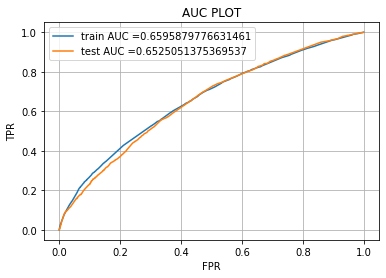

the maximum value of tpr*(1-fpr) 0.37730377681398464 for threshold 0.102
Train confusion matrix
[[25759 15250]
 [ 2122  3192]]
Test confusion matrix
[[9603 8623]
 [ 711 1651]]

Recall  0.6989839119390348

Precision 0.16069690480825385

F1 Score 0.4671335588488902


In [251]:
best_val = 11
c = .1
best_Custom_model(X_tr,y_train,best_val,c)

### SGD

In [131]:
SGD(X_tr,y_train)

alpha   Train AUC 	    Val AUC
1e-05 	 0.6243408794674838 0.6314922778421193
0.0001 	 0.6375858676037343 0.652620291222646
0.001 	 0.6000550605702064 0.6049016723511556
0.1 	 0.5 0.5
1 	 0.5 0.5
10 	 0.5 0.5


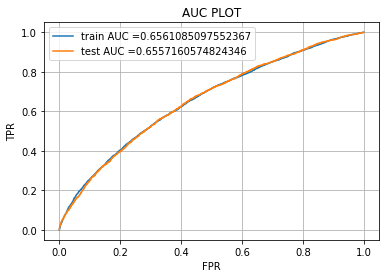

the maximum value of tpr*(1-fpr) 0.3763642839519893 for threshold 0.106
METRICS 
 
Train confusion matrix
[[26054 14955]
 [ 2166  3148]]
Test confusion matrix
[[10076  8150]
 [  767  1595]]

Recall  0.6752751905165114

Precision 0.16367367880964598

F1 Score 0.47836551831858587


In [227]:
alpha=.00001
sgd_best_model(alpha,X_tr,y_train)

### Logistic Regression

In [133]:
Logistic_regression(X_tr,y_train)

C.      Train AUC 	    Val AUC
0.001 	 0.5632256862605399 0.5804408304236556
0.01 	 0.5976104178752614 0.6079605703502364
0.1 	 0.6536668933748747 0.6646266237867994
1 	 0.6641608238910406 0.6687034823818275
10 	 0.6671955612192787 0.6671693061708728
100 	 0.6671054096251929 0.6664417697556564
1000 	 0.667092056212855 0.6662716314304319


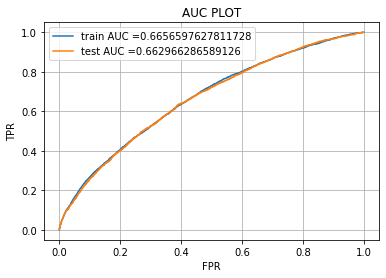

the maximum value of tpr*(1-fpr) 0.3831162464653724 for threshold 0.102
Best threshold  0.1022346150333123
Train confusion matrix
[[24952 16057]
 [ 1968  3346]]
Test confusion matrix
[[8547 9679]
 [ 601 1761]]

Recall  0.7455546147332769

Precision 0.15393356643356643

F1 Score 0.43982078808383174


In [228]:
c = 1000
model = LogisticRegression(C=c,penalty='l1', solver='liblinear')
best_model(model)

### Decison Tree

In [ ]:
decision_tree(X_tr,y_train)

DEPTH.  Min Samples  Train auc  Test auc
1 	 5 	 0.5771801008128483 	 0.5918735396219585
1 	 10 	 0.5771801008128483 	 0.5918735396219585
1 	 100 	 0.5771801008128483 	 0.5918735396219585
1 	 500 	 0.5771801008128483 	 0.5918735396219585
5 	 5 	 0.6634016640444267 	 0.6400118068813996
5 	 10 	 0.6633772998029119 	 0.6399390614970157
5 	 100 	 0.6633199512562822 	 0.640592159814591
5 	 500 	 0.6632882242827756 	 0.6412338013534109
10 	 5 	 0.7123815973348167 	 0.5497314820059627
10 	 10 	 0.7107778800458473 	 0.544467226346479
10 	 100 	 0.700397194267269 	 0.5776369541268102
10 	 500 	 0.6900142301487507 	 0.5821609367359567
50 	 5 	 0.9945277555631348 	 0.513811446110533
50 	 10 	 0.9751391813319332 	 0.5147413443314006
50 	 100 	 0.8300263141150442 	 0.533775161769716
50 	 500 	 0.724693025929399 	 0.5632178033139859


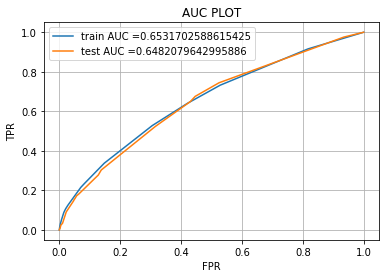

the maximum value of tpr*(1-fpr) 0.37073173202944804 for threshold 0.112
Best threshold  0.11203791469194313
Train confusion matrix
[[23734 17275]
 [ 1910  3404]]
Test confusion matrix
[[10086  8140]
 [  766  1596]]

Recall  0.6756985605419137

Precision 0.1639276910435497

F1 Score 0.4787828010400561


In [233]:
depth=5
samples=100
model=DecisionTreeClassifier(criterion='gini',max_depth=depth,min_samples_split=samples)
best_model(model)

### Random Forest

In [ ]:
random_forest_estimator(X_tr,y_train)

Estimators  Train auc    Test auc
10 	 0.6728343607950495 0.6473513909231265
50 	 0.6770350322780427 0.6521925714824551
100 	 0.677774916863995 0.651009798415191
250 	 0.6793896243325347 0.6532117706490788
450 	 0.6797396626990452 0.65391143922408


In [ ]:
estimator= 50
random_forest_depth(estimator,X_tr,y_train)

Depth     Train auc       Test auc
3 	 0.6674395822105492 0.6528743427111849
5 	 0.6770350460444472 0.6521925921252998
9 	 0.7319675244461288 0.6409834036483668
11 	 0.7861854346796819 0.6360563901411757
15 	 0.926703998432906 0.6191918673137401
20 	 0.996339912276616 0.6117788979594465


In [ ]:
estimator = 50
depth = 3
random_forest_other_hyperparameters(estimator,depth,X_tr,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


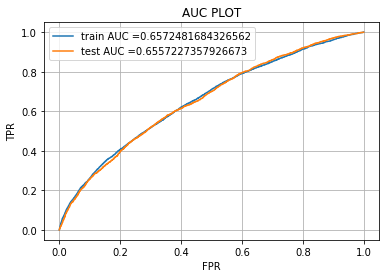

the maximum value of tpr*(1-fpr) 0.37273063231399317 for threshold 0.113
Best threshold  0.11296656468779487
Train confusion matrix
[[24855 16154]
 [ 2046  3268]]
Test confusion matrix
[[ 7719 10507]
 [  532  1830]]

Recall  0.7747671464860287

Precision 0.1483342789981357

F1 Score 0.4160343153448479


In [234]:
estimator = 50
depth = 3
max_featues='sqrt'
min_samples_split=10
min_samples_leaf=4

model = RandomForestClassifier(n_estimators=estimator,max_depth=depth,max_features=max_featues, min_samples_leaf=min_samples_leaf,
                               bootstrap=True, class_weight=None, criterion='gini',
                              max_leaf_nodes=None,min_weight_fraction_leaf=0.0,
                              n_jobs=-1,random_state=25,verbose=0,warm_start=False)

model  = best_model(model)

### XGboost

In [ ]:
XGBoost_learning_rate(X_tr,y_train)

LearningRate , Train ACU  CV auc
0.05 	 0.6797502398864811 0.6583534078116157
0.1 	 0.6894087745024677 0.6608749932085041
0.15 	 0.6983918834270415 0.656378713296816
0.2 	 0.7060921951892969 0.650758822710498
0.25 	 0.7113205585933371 0.6404210099899809
0.3 	 0.7176618738501209 0.639256609054414


In [ ]:
learning_rate=.05
XGBoost_estimators(learning_rate,X_tr,y_train)

Estimators , Train ACU  CV auc
10 	 0.652043086312979 0.6435895421367523
50 	 0.6695037742571045 0.653928944356304
100 	 0.6797502398864811 0.6583534078116157
250 	 0.6931820587810236 0.6598327979129919
450 	 0.7068873174731933 0.6488270446696295


In [ ]:
learning_rate=.05
estimator=10
XGBoost_depth(learning_rate,estimator,X_tr,y_train)

Depth  Train ACU  CV auc
1 	 0.6097367250401068 0.6031095225111872
2 	 0.6511111603846418 0.6368684590050446
3 	 0.652043086312979 0.6435895421367523
4 	 0.6697865797985743 0.6507989730432524
5 	 0.6765595131347698 0.6549939499951035
6 	 0.6831603342934544 0.6425678245430871
7 	 0.6923885288112446 0.6147683740721247


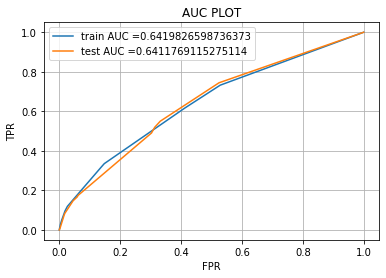

the maximum value of tpr*(1-fpr) 0.3623135848724028 for threshold 0.492
Best threshold  0.4924625
Train confusion matrix
[[24094 16915]
 [ 2037  3277]]
Test confusion matrix
[[8662 9564]
 [ 604 1758]]

Recall  0.7442845046570703

Precision 0.15527291997880233

F1 Score 0.44354468316961004


In [236]:
depth=4
learning_rate=.01
estimator=2
model = XGBClassifier(learning_rate=learning_rate,n_estimators=estimator,max_depth=depth)
best_model(model)

# Summary

## Data Model 1

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["Model","AUC"," Recall",'Precision','F1 Score'],
         ["Multi NB",.601,0.543,0.149,0.478],
         ["SGD",.62,0.609,0.155,.4763],
         ["Logistic Regression",.652,0.738,.15,.432],
         ["Decision Tree",.63,.616,0.163,0.450],
         ["Random Forest",.644,0.616,0.163,.489],
         ["XGBoost",.635,0.612,0.161,.487],
         ["Custom Model",.639,.636,0.158,.476] 
         ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,AUC,Recall,Precision,F1 Score
Multi NB,0.601,0.543,0.149,0.478
SGD,0.62,0.609,0.155,0.4763
Logistic Regression,0.652,0.738,0.15,0.432
Decision Tree,0.63,0.616,0.163,0.45
Random Forest,0.644,0.616,0.163,0.489
XGBoost,0.635,0.612,0.161,0.487
Custom Model,0.639,0.636,0.158,0.476


##Data  Model 2

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["Model","AUC","Recall",'Precision','F1 Score'],
        ["Multi NB",.594,0.569,0.145,0.464],
         ["SGD",.621,0.533,.163,.504],

         ["Logistic Regression",.653,0.642,.162,.480],

         ["Decision Tree",.635,.685,0.154,0.457],
         ["Random Forest",0.645,0.638,.163,.484],
         ["XGBoost",.635,.612,.161,.487],
         ["Custom Model",.636,.649,.156,.469] 
         ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,AUC,Recall,Precision,F1 Score
Multi NB,0.594,0.569,0.145,0.464
SGD,0.621,0.533,0.163,0.504
Logistic Regression,0.653,0.642,0.162,0.48
Decision Tree,0.635,0.685,0.154,0.457
Random Forest,0.645,0.638,0.163,0.484
XGBoost,0.635,0.612,0.161,0.487
Custom Model,0.636,0.649,0.156,0.469


In [ ]:
#SUMMARY 

#Best model : Logistic regression of Data modelling : 2

# Training the best Model

In [ ]:
def Train_BEST_MODEL(X) :

  #Preprocessing 
  X = preprocess(X)
  X = preprocess_diag(X) 

  #Feature Engineering 
  X = total_drugs_prescribed(X)
  X = total_procedures(X)
  X = service_utilization(X)

  #DATA modelling 

  race   = race_vectorizer.transform(X['race'].values)
  gender = gender_vectorizer.transform(X['gender'].values)

  X['age']=X['age'].map(d)
  age = (X['age'].values.reshape(-1,1))
  
  #DATA modelling - REal values
  admission_type = pd.DataFrame(admission_type_id_enc.transform(X[['admission_type_id']]).toarray())
  discharge_type = pd.DataFrame(discharge_disposition_id_enc.transform(X[['discharge_disposition_id']]).toarray())
  admission_source = pd.DataFrame(admission_source_id_enc.transform(X[['admission_source_id']]).toarray())
 
  time = time_in_hospital_normalizer.transform(X['time_in_hospital'].values.reshape(1,-1)).reshape(-1,1)
  num_lab_procedures = num_lab_procedures_normalizer.transform(X['num_lab_procedures'].values.reshape(1,-1)).reshape(-1,1)
  num_procedures = num_procedures_normalizer.transform(X['num_procedures'].values.reshape(1,-1)).reshape(-1,1)
  num_medications = num_medications_normalizer.transform(X['num_medications'].values.reshape(1,-1)).reshape(-1,1)
  number_outpatient = number_outpatient_normalizer.transform(X['number_outpatient'].values.reshape(1,-1)).reshape(-1,1)
  emergency = number_emergency_normalizer.transform(X['number_emergency'].values.reshape(1,-1)).reshape(-1,1)
  number_inpatient = number_inpatient_normalizer.transform(X['number_inpatient'].values.reshape(1,-1)).reshape(-1,1)
  diag_1 = pd.DataFrame(diag_1_enc.transform(X[['diag_1']]).toarray())
  num_diag = number_diagnoses_normalizer.transform(X['number_diagnoses'].values.reshape(1,-1)).reshape(-1,1)
  
  #Data modelling - Test results
  max_glu_serum = pd.DataFrame(max_glu_serum_enc.transform(X[['max_glu_serum']]).toarray())
  a1c = pd.DataFrame(A1Cresult_enc.transform(X[['A1Cresult']]).toarray())
  
  #Data modelling - Drugs prescribed
 
  insulin = insulin_vectorizer.transform(X['insulin'].values)
  change = change_vectorizer.transform(X['change'].values)
  diabetesMed = pd.DataFrame(diabetesMed_enc.fit_transform(X[['diabetesMed']]).toarray())
 
  #Data modelling of new features
  service= service_utilization_normalizer.transform(X['service_utilization'].values.reshape(1,-1)).reshape(-1,1)
  procedure= total_procesure_normalizer.transform(X['total_procesure'].values.reshape(1,-1)).reshape(-1,1)
  drugs_prescribed= total_drugs_prescribed_normalizer.transform(X['total_drugs_prescribed'].values.reshape(1,-1)).reshape(-1,1)


  #Stacking


  X_te = hstack((race ,gender ,age,           
               admission_type,discharge_type,admission_source,
               time,num_lab_procedures,num_procedures,num_medications,
               number_outpatient,emergency,number_inpatient,diag_1,num_diag,
               max_glu_serum,a1c, insulin ,change,diabetesMed,
               service,procedure,drugs_prescribed)).tocsr()

  
  model = LogisticRegression(C=1,penalty='l1', solver='liblinear')
  model.fit(X_tr, y_train)

  return model


In [ ]:
#Train the model and whole data 

y = df['readmitted'].values
X = df.drop(['readmitted'],axis=1)
best_model = Train_BEST_MODEL(X)


#Save the model
pickle.dump(best_model,open('best_model','ab'))